# Create a Neurodata Without Borders File for the Wild and Mutant drosophila

In [1]:
import nwb
from nwb import nwb_file
from nwb import nwb_utils as utils

import neuroarch_nlp

import h5py
import scipy.io as sio



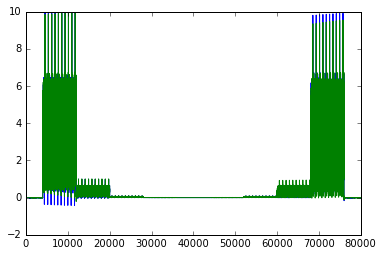

In [2]:
# Load the two data files

mutant_data = sio.loadmat('MutantBG6Data.mat')
wild_data = sio.loadmat('WildBG6Data.mat')

# Plot an example trace
plt.plot(wild_data['recorded_input']); 
plt.plot(mutant_data['recorded_input']); 
plt.show()

In [3]:
# Create Basic descriptor

settings = {}
settings["file_name"] = "../data/wild_photoreceptor_data.nwb"
settings["identifier"] = utils.create_identifier("BG6")
settings["mode"] = "w"
settings["start_time"] = "2011-01-01T00:00:00.604121Z"
settings["description"] = "A test file using the drosophila photoreceptor data for wild type and histamine defficient flys."
# specify an extension (Could be more than one).
wild = nwb_file.open(**settings)

settings["file_name"] = "../data/mutant_photoreceptor_data.nwb"
mutant = nwb_file.open(**settings)


In [4]:

wild.set_dataset("lab", "Coca Lab")
wild.set_dataset("experiment_description", "Photoreceptor strimulation with histamine transmission")
wild.set_dataset("experimenter", "Uwe")
wild.set_dataset("institution", "The University of Sheffield")
wild.set_dataset("session_id", "0")

mutant.set_dataset("lab", "Coca Lab")
mutant.set_dataset("experiment_description", "Photoreceptor strimulation without histamine transmission")
mutant.set_dataset("experimenter", "Uwe Friederich")
mutant.set_dataset("institution", "The University of Sheffield")
mutant.set_dataset("session_id", "0")


In [5]:
g = wild.make_group("subject")
g.set_dataset("genotype", "Canton S")
g.set_dataset("species", "drosophila melongaster")

g = mutant.make_group("subject")
g.set_dataset("genotype", "HDC JF-910")
g.set_dataset("species", "drosophila melongaster")

In [6]:
# Sample recorded at a rate of 400 samples a second.

freq = 1/400.0
times = np.arange(0,freq*len(wild_data['recorded_input']),freq)

# Store the recorded input in the stimulus/presentation directory


ts = wild.make_group("<TimeSeries>", "recorded_input",
   path="/stimulus/presentation", attrs= {"source": "..."})

ts.set_dataset("data", wild_data['recorded_input'],
   attrs={"unit": "unit used"}, compress=True )
ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))

ts = mutant.make_group("<TimeSeries>", "recorded_input",
   path="/stimulus/presentation", attrs= {"source": "..."})

ts.set_dataset("data", mutant_data['recorded_input'],
   attrs={"unit": "unit used"}, compress=True )
ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))



In [7]:
# Add the wild type data

ts = wild.make_group("<TimeSeries>", "output",
   path="/acquisition/timeseries", attrs= {"source": "unknown"})

ts.set_dataset("data", wild_data['recorded_output'],
   attrs={"unit": "s"}, compress=True )

ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))





In [8]:
# Add the mutant type data

ts = mutant.make_group("<TimeSeries>", "output",
   path="/acquisition/timeseries", attrs= {"source": "unknown"})

ts.set_dataset("data", mutant_data['recorded_output'],
   attrs={"unit": "s"}, compress=True )

ts.set_dataset("timestamps", times, compress=True)
ts.set_dataset("num_samples", len(times))

In [9]:
wild['subject']

TypeError: 'File' object has no attribute '__getitem__'

In [10]:
wild.close()
mutant.close()


******
Validation messages follow.
** No errors. -- Good
No Miscellaneous errors. -- Good
No groups missing. -- Good
No datasets missing. -- Good
No attributes missing. -- Good
No Incorrect attribute values. -- Good
No groups custom missing attribute neurodata_type=Custom. -- Good
No datasets custom missing attribute neurodata_type=Custom. -- Good
No groups defined in extension, but missing attribute schema_id. -- Good
No datasets defined in extension, but missing attribute schema_id. -- Good
** 4 warnings.
No Miscellaneous warnings. -- Good
No groups custom inside custom missing attribute neurodata_type=Custom. -- Good
No datasets custom inside custom missing attribute neurodata_type=Custom. -- Good
No recommended groups missing. -- Good
No recommended datasets missing. -- Good
4 recommended attributes missing:
  1. /acquisition/timeseries/output - comments
  2. /acquisition/timeseries/output - description
  3. /stimulus/presentation/recorded_input - comments
  4. /stimulus/presentat

{'added': 0, 'errors': 0, 'warnings': 4}

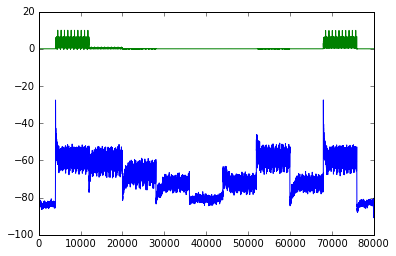

In [11]:
wild = h5py.File('../data/wild_photoreceptor_data.nwb')
plt.plot(wild['acquisition']['timeseries']['output']['data'][:])
plt.plot(wild['stimulus']['presentation']['recorded_input']['data'][:])
plt.show()
wild.close()

In [12]:
mutant = h5py.File('../data/mutant_photoreceptor_data.nwb')

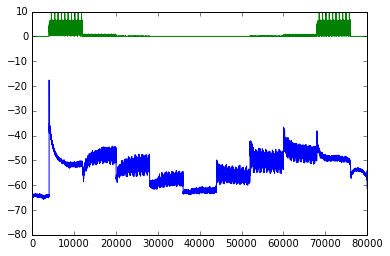

In [13]:
plt.plot(mutant['acquisition']['timeseries']['output']['data'][:])
plt.plot(mutant['stimulus']['presentation']['recorded_input']['data'][:])
plt.show()